In [1]:
pip install tensorflow 

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'2.6.0'

In [4]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.optimizers import RMSprop 
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os


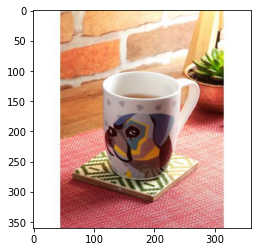

In [5]:
img = image.load_img(r"D:\COFFE_MUGS\Train\Good_Mugs\1-catalog_360 (1).jpg")
plt.imshow(img)

In [6]:
train=ImageDataGenerator(rescale= 1/255)
validation=ImageDataGenerator(rescale= 1/255)

In [7]:
train_dataset= train.flow_from_directory("D:\COFFE_MUGS\Train",
                                        target_size=(200, 200),class_mode='binary',batch_size=10)

Found 323 images belonging to 2 classes.


In [8]:
validation_dataset= train.flow_from_directory("D:\COFFE_MUGS\Validation",
                                        target_size=(200, 200),class_mode='binary',batch_size=10)

Found 305 images belonging to 2 classes.


In [9]:
train_dataset.class_indices

{'Broken_Mugs': 0, 'Good_Mugs': 1}

In [10]:
model= tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation="relu",input_shape=(200,200,3)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(32, (3, 3), activation='relu'), 
                                   tf.keras.layers.MaxPool2D(2, 2),
                                   #
                                   tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   ##
                                   tf.keras.layers.Flatten(),
                                   ##
                                   tf.keras.layers.Dense(512, activation='relu'),
                                   ##
                                   tf.keras.layers.Dense(1, activation="sigmoid")  ])

In [11]:
model.compile(loss="binary_crossentropy",
             optimizer = RMSprop(lr=0.001),
             metrics = ["accuracy"])

C:\Users\new\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [12]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch= 3,
                     epochs= 30,
                     validation_data= validation_dataset)

Epoch 1/30
3/3 [==============================] - 6s 2s/step - loss: 4.8702 - accuracy: 0.8667 - val_loss: 3.7812 - val_accuracy: 0.0426
Epoch 2/30
3/3 [==============================] - 4s 2s/step - loss: 1.3825 - accuracy: 0.6000 - val_loss: 0.4548 - val_accuracy: 0.9574
Epoch 3/30
3/3 [==============================] - 4s 2s/step - loss: 0.2466 - accuracy: 0.9667 - val_loss: 0.1726 - val_accuracy: 0.9574
Epoch 4/30
3/3 [==============================] - 4s 2s/step - loss: 0.6002 - accuracy: 0.8000 - val_loss: 0.1654 - val_accuracy: 0.9574
Epoch 5/30
3/3 [==============================] - 4s 2s/step - loss: 0.5408 - accuracy: 0.8000 - val_loss: 0.1862 - val_accuracy: 0.9574
Epoch 6/30
3/3 [==============================] - 4s 2s/step - loss: 0.4201 - accuracy: 0.8333 - val_loss: 0.2154 - val_accuracy: 0.9574
Epoch 7/30
3/3 [==============================] - 4s 2s/step - loss: 0.1845 - accuracy: 0.9333 - val_loss: 0.1681 - val_accuracy: 0.9574
Epoch 8/30
3/3 [=========================

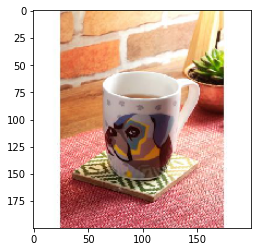

The Mug is good


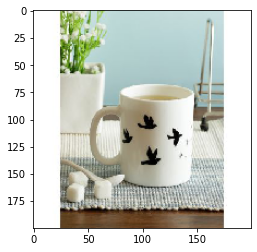

The Mug is good


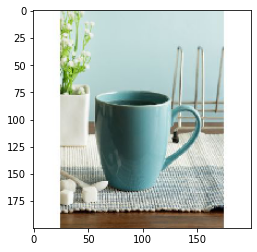

The Mug is good


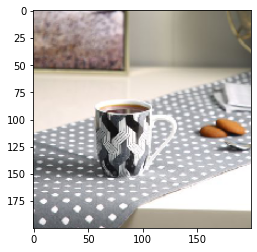

The Mug is good


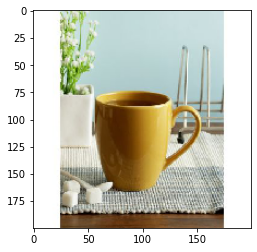

The Mug is good


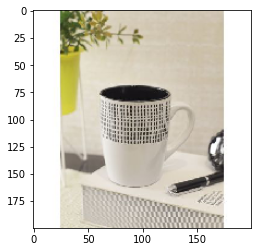

The Mug is good


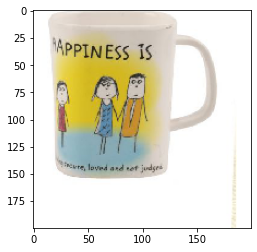

The Mug is good


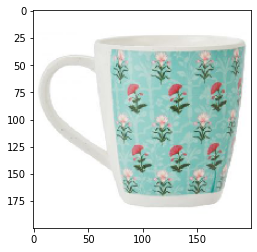

The Mug is good


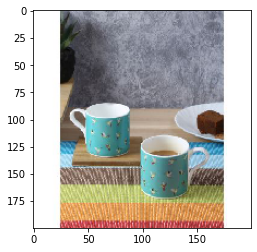

The Mug is good


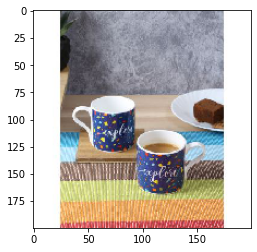

The Mug is good


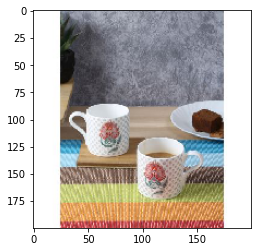

The Mug is good


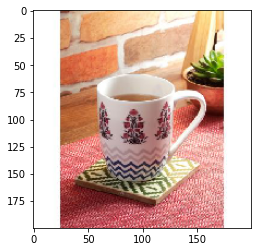

The Mug is good


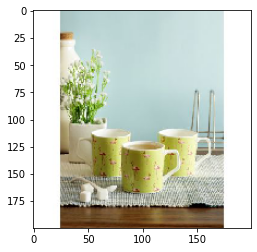

The Mug is good


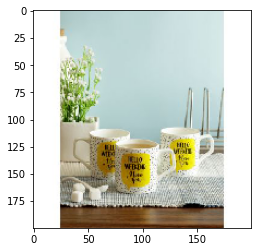

The Mug is good


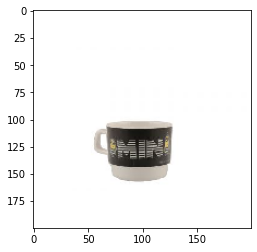

The Mug is good


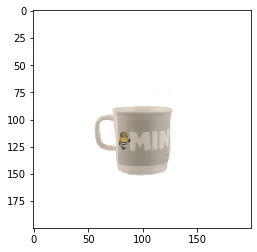

The Mug is good


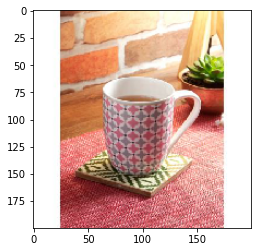

The Mug is good


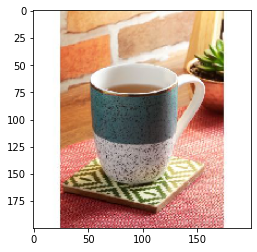

The Mug is good


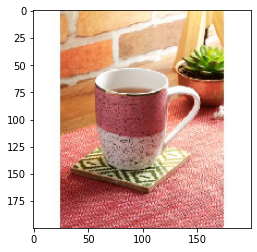

The Mug is good


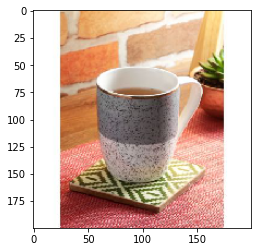

The Mug is good


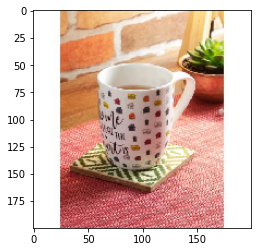

The Mug is good


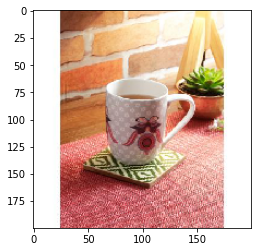

The Mug is good


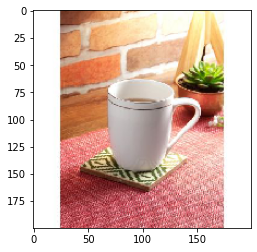

The Mug is good


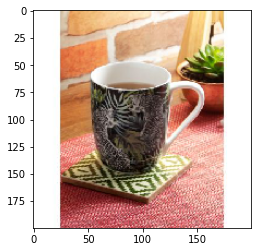

The Mug is good


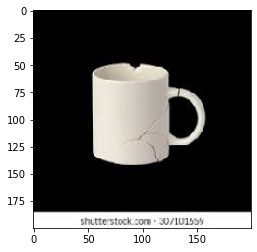

The Mug was Broke


C:\Users\new\anaconda3\lib\site-packages\PIL\Image.py:2929: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x000001BD566E9860>

In [13]:
dir_path= "D:\COFFE_MUGS\Test"
for i in os.listdir(dir_path):
    img= image.load_img(dir_path+'//'+i,target_size=(200,200))
    plt.imshow(img)
    plt.show()
    
    X=image.img_to_array(img)
    X=np.expand_dims(X,axis=0)
    images=np.vstack([X])
    val=model.predict(images)
    if val==0:
        print("The Mug was Broke")
    else:
        print("The Mug is good")
    
   